In [1]:
#Import libraries
import math
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
import time
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from sklearn.metrics.cluster import normalized_mutual_info_score

In [2]:
#Import FRUFS and vevestaX and create vevestaX object
from FRUFS import FRUFS
from vevestaX import vevesta as v
V=v.Experiment()

In [3]:
# Load the data into a dataframe
df = pd.read_csv("wine.csv")


In [4]:
# Split the data into input features and target variable
data, Y = df.drop(['ID'], axis=1), df['ID'].values

# Lets check out the shape of our data
print("Data shape: ", data.shape, "Target Variable shape: ", Y.shape)

Data shape:  (178, 13) Target Variable shape:  (178,)


In [5]:
#extract the names of the features
V.ds = data
#print the names of the features
V.ds

Index(['Alcohol', 'Malic acid', ' Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline  '],
      dtype='object')

In [6]:

#start the tracking scope of the variables
V.start()
num_classes = 2

# Modelling with FRUFS

In [7]:
# We want to time our algorithm
start = time.time()

# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)

# This will hold all the accuracy scores
scores = list()

# Perform CV
for train, test in kfold.split(data):
    # Split data into train and test based on folds
    x_train, x_test = data.iloc[train], data.iloc[test]
    y_train, y_test = Y[train], Y[test]
    
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    seed = 27
    
    noOfFeaturesSelected=5
    
    # Initialize the FRUFS object with your supervised algorithm of choice
    model = FRUFS(model_r=DecisionTreeRegressor(random_state=seed), k=noOfFeaturesSelected, n_jobs=-1, verbose=0, random_state=seed)
 
    # Train the FRUFS model and use it to downsize your data
    x_train = model.fit_transform(x_train)
    x_test = model.transform(x_test)
    
    # Finally, classify on selected features
    model_dt = DecisionTreeClassifier(random_state=27)
    model_dt.fit(x_train, y_train)
    preds = model_dt.predict(x_test)

    # We are going to use the NMI metric to measure the quality/performance of the clustering 
    score = accuracy_score(y_test, preds)
    print("Score:", score)
    scores.append(score)
    
# Compute average score
averageAccuracy = sum(scores)/len(scores)
print("\n\nAverage Accuracy: ", averageAccuracy)

# Finally, check out the total time taken
end = time.time()
timeTaken = end-start
print("\n\nTotal Time Required (in seconds): ", timeTaken)

Progress bar: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 703.69it/s]

Score: 0.8611111111111112
Score: 0.8055555555555556
Score: 0.9444444444444444
Score: 0.9428571428571428
Score: 0.8571428571428571


Average Accuracy:  0.8822222222222221


Total Time Required (in seconds):  3.8049275875091553


In [8]:
#end the tracking scope of variables
V.end()

{'num_classes': 2,
 'start': 1648189595.5561643,
 'seed': 27,
 'noOfFeaturesSelected': 5,
 'end': 1648189599.3610919,
 'timeTaken': 3.8049275875091553}

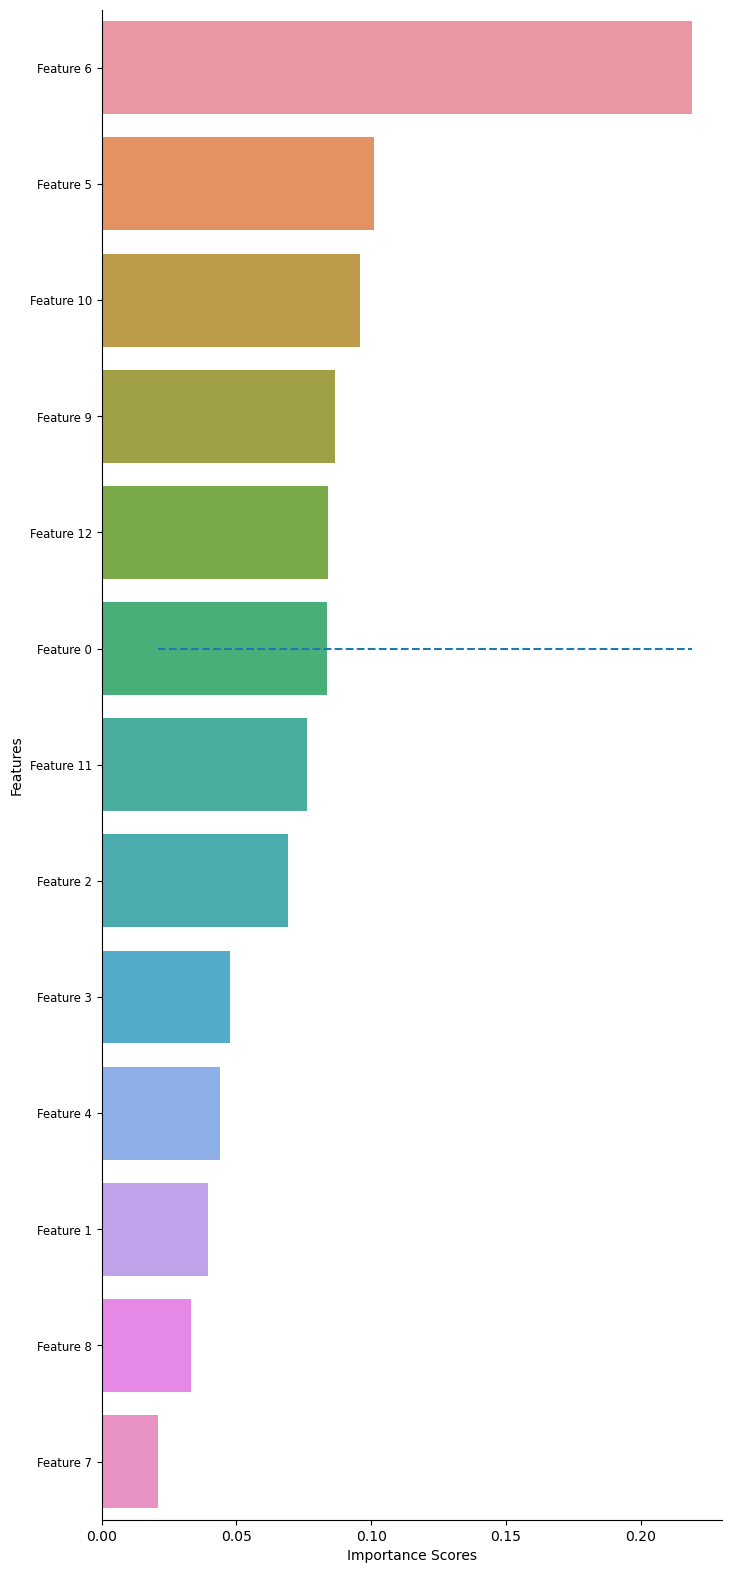

In [9]:
figure(figsize=(8, 20), dpi=100)
model.feature_importance()

In [10]:
V.dump(techniqueUsed = "Decision tree with FRUFS",message= "5 selected features were used", version=1)

Dumped the experiment in the file vevesta.xlsx
Manage notes, codes and models in one single place by using our tool at https://www.vevesta.com?utm_source=vevestaX
